<a href="https://colab.research.google.com/github/Solo7602/MADPA/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оценка модели до уменьшения размерности:
Accuracy: 0.9987788466331057

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00     24347
           2       1.00      1.00      1.00     12571
           3       1.00      0.95      0.98       220

    accuracy                           1.00     40126
   macro avg       1.00      0.99      0.99     40126
weighted avg       1.00      1.00      1.00     40126



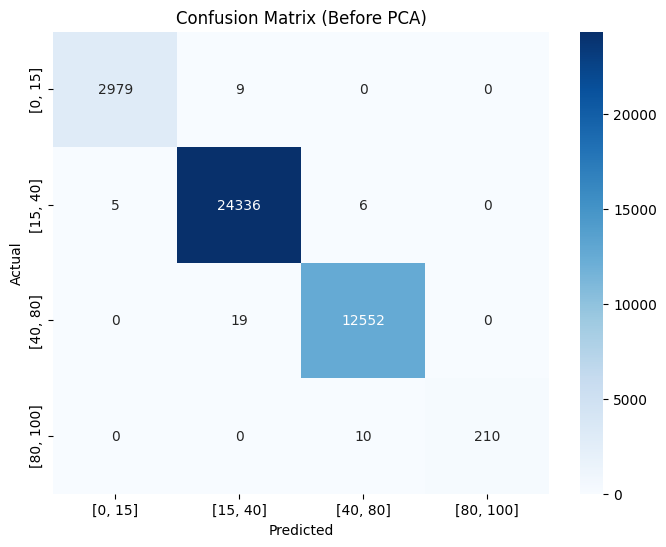

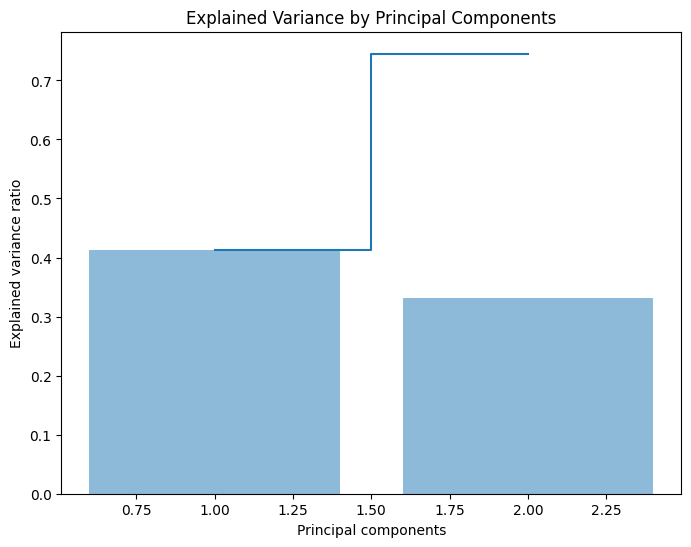

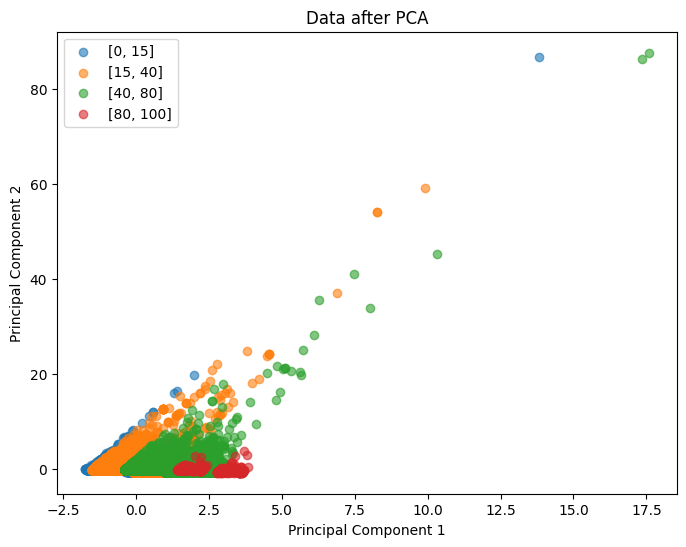

Оценка модели после уменьшения размерности:
Accuracy: 0.9790908637790958

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2988
           1       0.99      0.99      0.99     24347
           2       0.96      0.97      0.97     12571
           3       0.96      0.35      0.52       220

    accuracy                           0.98     40126
   macro avg       0.98      0.82      0.86     40126
weighted avg       0.98      0.98      0.98     40126



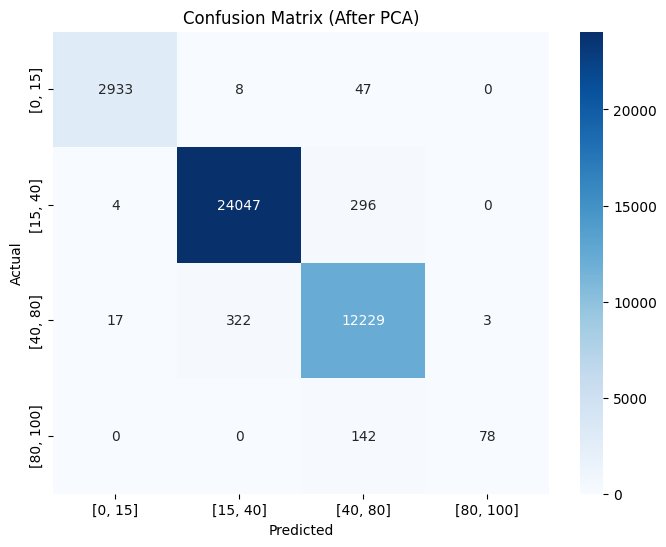

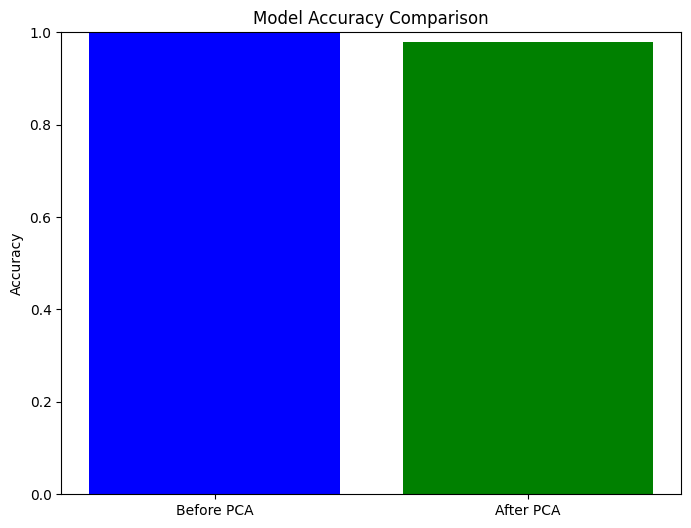

Accuracy before PCA: 0.9988
Accuracy after PCA: 0.9791


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка и подготовка данных
data = pd.read_csv('10k_dataset_processed_final_with_ageGroup.csv')

# Преобразование Age_Group в числовой формат
age_group_mapping = {'[0, 15]': 0, '[15, 40]': 1, '[40, 80]': 2, '[80, 100]': 3}
data['Age_Group_Num'] = data['Age_Group'].map(age_group_mapping)

# Выбор признаков и целевой переменной
features = ['Age', 'Sex_Male', 'Comment_Length']
X = data[features]
y = data['Age_Group_Num']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Классификация до уменьшения размерности
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Оценка модели
print("Оценка модели до уменьшения размерности:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Матрица решения
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=age_group_mapping.keys(),
            yticklabels=age_group_mapping.keys())
plt.title('Confusion Matrix (Before PCA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Уменьшение размерности с помощью PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Визуализация объясненной дисперсии
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.show()

# Визуализация данных после PCA
plt.figure(figsize=(8, 6))
for i, group in enumerate(age_group_mapping.keys()):
    mask = y_train == i
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=group, alpha=0.6)
plt.title('Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 4. Классификация после уменьшения размерности
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Оценка модели
print("Оценка модели после уменьшения размерности:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

# Матрица решения
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Blues',
            xticklabels=age_group_mapping.keys(),
            yticklabels=age_group_mapping.keys())
plt.title('Confusion Matrix (After PCA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Сравнение результатов
acc_before = accuracy_score(y_test, y_pred)
acc_after = accuracy_score(y_test, y_pred_pca)

plt.figure(figsize=(8, 6))
plt.bar(['Before PCA', 'After PCA'], [acc_before, acc_after], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

print(f"Accuracy before PCA: {acc_before:.4f}")
print(f"Accuracy after PCA: {acc_after:.4f}")